In [1]:
import os
import sys
import importlib
from functools import partial

import h5py
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt


sys.path.append('../../../')
import forward_model
importlib.reload(forward_model)
from forward_model.main import get_forward_model

In [ ]:
N, L, Z_I, Z_F = 16, 400, 99, 0
N_TR = 1e6

BIAS_MODEL = "POWER_LAW"
ALPHA = 2.5
BIAS_PARAMS = {"ALPHA": ALPHA}

enes = [8, 16, 32, 64, 128]

for n in enes:
    print('N', n)
    LPT_METHOD = "LPT1"
    argdic = {
        "N": n,
        "L": L,
        "Z_I": Z_I,
        "Z_F": Z_F,
        "LPT_METHOD": LPT_METHOD,
        "PM_METHOD": "CIC",
        "INPUT_ARG": "U",
        "MUSCLE": True,
        "MUSCLE_ITERS": "ONE",
        "SC_CORRECTION": True,
        "BIAS_MODEL": BIAS_MODEL,
        "BIAS_PARAMS": BIAS_PARAMS,
        "N_TR": N_TR,
        "SAMPLE": 1,
    }

    get_tracers_poisson = get_forward_model(argdic)

    argdic['SAMPLE'] = False
    get_tracers_mean = get_forward_model(argdic)



    SHAPE = n**3

    seed_ints = 1, 3

    key = jax.random.PRNGKey(seed_ints[0])
    u_ref = jax.random.normal(key, shape=SHAPE)
    n_tr_ref = get_tracers_poisson(u_ref)

    key = jax.random.PRNGKey(seed_ints[1])
    u = jax.random.normal(key, shape=SHAPE)


    epsilon = 1e-10
    def nll(q):
        n_tr = get_tracers_mean(q)
        n_tr = jnp.where(n_tr == 0.0, epsilon, n_tr)
        nll = -jnp.sum(n_tr_ref * jnp.log(n_tr))
        return nll 

    nll = jax.jit(nll)
    grad_nll = jax.grad(nll)
    grad_nll = jax.jit(grad_nll)

    nll_val = nll(u)
    grad_nll_vals = grad_nll(u)


    fact = 1#n**(-3/2)

    print(nll_val)

    max_gnll = jnp.max(grad_nll_vals)
    min_gnll = jnp.min(grad_nll_vals)

    print('max_gnll', max_gnll*fact)
    print('max_gnll', min_gnll*fact)
    print('std_gnll', jnp.std(grad_nll_vals)*fact)

N 8


/home/prossello/Documents/IAC_beca/cosmo_env/lib64/python3.12/site-packages/jax/_src/numpy/array_methods.py:69: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/home/prossello/Documents/IAC_beca/cosmo_env/lib64/python3.12/site-packages/jax/_src/numpy/array_methods.py:69: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/home/pros

-7534677.0
max_gnll 2183.4224
max_gnll -4634.347
std_gnll 499.28897
N 16
-5296597.0
max_gnll 3901.3633
max_gnll -3500.318
std_gnll 281.46606
N 32


/home/prossello/Documents/IAC_beca/cosmo_env/lib64/python3.12/site-packages/jax/_src/numpy/array_methods.py:69: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/home/prossello/Documents/IAC_beca/cosmo_env/lib64/python3.12/site-packages/jax/_src/numpy/array_methods.py:69: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/home/pros

-2844557.2
max_gnll 5444.218
max_gnll -3547.9695
std_gnll 143.352
N 64
157826.69
max_gnll 8610.597
max_gnll -9107.997
std_gnll 93.96101
N 128


/home/prossello/Documents/IAC_beca/cosmo_env/lib64/python3.12/site-packages/jax/_src/numpy/array_methods.py:69: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/home/prossello/Documents/IAC_beca/cosmo_env/lib64/python3.12/site-packages/jax/_src/numpy/array_methods.py:69: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/home/pros

3758438.0
max_gnll 62561.574
max_gnll -44218.875
std_gnll 218.60843


-3800100.2
max_gnll 68482.03
max_gnll -131334.69


n_tr min 0
n_tr max 11539
n_tr sum 998763
% zeros 4.32


n_tr min 1e-10
n_tr max 11416.70133159725
n_tr sum 1000000.0000000002
% zeros 0.00


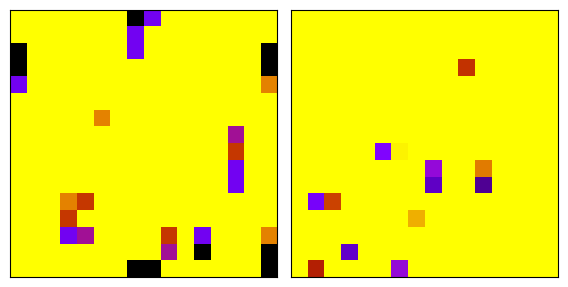

In [ ]:
SHAPE = N**3

seed_ints = 1, 3

key = jax.random.PRNGKey(seed_ints[0])
u_ref = jax.random.normal(key, shape=SHAPE)
n_tr_ref = get_tracers_poisson(u_ref)

key = jax.random.PRNGKey(seed_ints[1])
u = jax.random.normal(key, shape=SHAPE)
n_tr = get_tracers_mean(u)

# there should not be true zeros
epsilon = 1e-10
n_tr = jnp.where(n_tr == 0.0, epsilon, n_tr)


print("n_tr min", n_tr_ref.min())
print("n_tr max", n_tr_ref.max())
print("n_tr sum", n_tr_ref.sum())
num_zeros = jnp.sum(n_tr_ref == 0.0)
print(f"% zeros {100*num_zeros/N**3:0.2f}")
print("\n")
print("n_tr min", n_tr.min())
print("n_tr max", n_tr.max())
print("n_tr sum", n_tr.sum())
num_zeros = jnp.sum(n_tr == 0.0)
print(f"% zeros {100*num_zeros/N**3:0.2f}")


In [ ]:
epsilon = 1e-20
def nll(q):
    n_tr = get_tracers_mean(q)
    n_tr = jnp.where(n_tr == 0.0, epsilon, n_tr)
    nll = -jnp.sum(n_tr_ref * jnp.log(n_tr))
    return nll 
nll = jax.jit(nll)
grad_nll = jax.grad(nll)
grad_nll = jax.jit(grad_nll)

nll_val = nll(u)
grad_nll_vals = grad_nll(u)

print(nll_val)

-4114613.5854729516


max_gnll 63166.835326127955
max_gnll -54977.20166791646


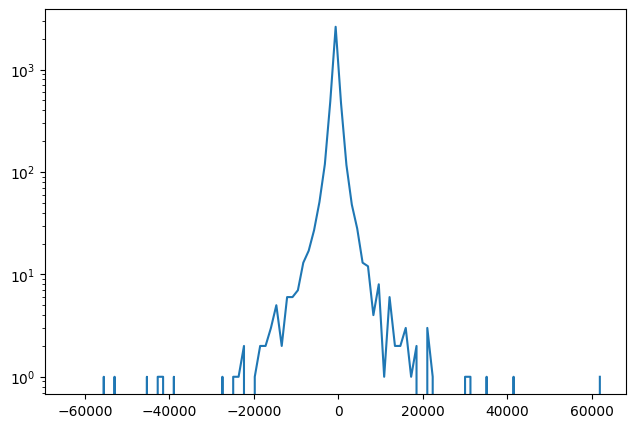

In [ ]:
fs, rat = 5, 1.5
fig, ax = plt.subplots(1, 1, figsize=(fs*rat, fs))

max_gnll = jnp.max(grad_nll_vals)
min_gnll = jnp.min(grad_nll_vals)

print('max_gnll', max_gnll)
print('max_gnll', min_gnll)

abs_max_gnll = max([jnp.abs(min_gnll), jnp.abs(max_gnll)])

M=100
bin_edges = jnp.linspace(-abs_max_gnll, abs_max_gnll, M)

hist, edges = jnp.histogram(grad_nll_vals, bins=bin_edges)

ax.plot(edges[:-1], hist)

ax.set_yscale('log')